In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
l = 1E-3
n_t = 1E-3
E_1 = 2
rhow = 6.3382E28
N_Tis = 6 * rhow
T = 1000
k_B = 8.617333E-5

# Load data
a = np.loadtxt('Flux2EvTrap.txt')
b = np.loadtxt('Medium_flux_festim.txt')
time = a[:, 0]

# Calculate constants
D = 1.9E-7 * np.exp(-0.2 / k_B / T)
S = 2.9E-5 * np.exp(-1 / k_B / T)
N_A_const = 6.02214076E23
c0m = (1E5)**0.5 * S * 1.0525E5

zeta = (N_Tis * np.exp((0.2 - E_1) / (k_B * T)) + c0m * N_A_const) / (rhow * 1E-3)
Deff = D / (1 + 1 / zeta)
steepest_an = l**2 / (2 * np.pi**2 * Deff)
flux = np.ones(len(time))
strong_breakthrough = l**2 * n_t / (2 * c0m * 6 * D)

for m in range(1, len(time)):
    add = 2 * (-1)**m * np.exp(-m**2 * np.pi**2 * Deff * time / l**2)
    flux += add

flux *= c0m * D / l

gradflux = np.diff(flux)
m = np.max(gradflux)
i = np.argmax(gradflux)
ti = time[i]
if time[0] != ti:
    steepest = flux[i] + m / time[1] * (time[1:] - ti)
else:
    steepest = np.nan * np.ones(len(time) - 1)  # Handle the case where time[0] is equal to ti

breakthrough = np.where(steepest >= 0)[0]
res = time[breakthrough[0]]

# Plot figures
plt.figure(1)
import pandas as pd 
fluxbulk3=pd.read_csv('flux_bulk_3.out',  delim_whitespace=True)  # Adjust the delimiter as needed
new_column_names = {
    'time(s)': 'Time',
    'N_conf_rec*flux_bulk(molecule.m-2s-1)': 'Flux'
}

fluxbulk3.rename(columns=new_column_names, inplace=True)



<Figure size 640x480 with 0 Axes>

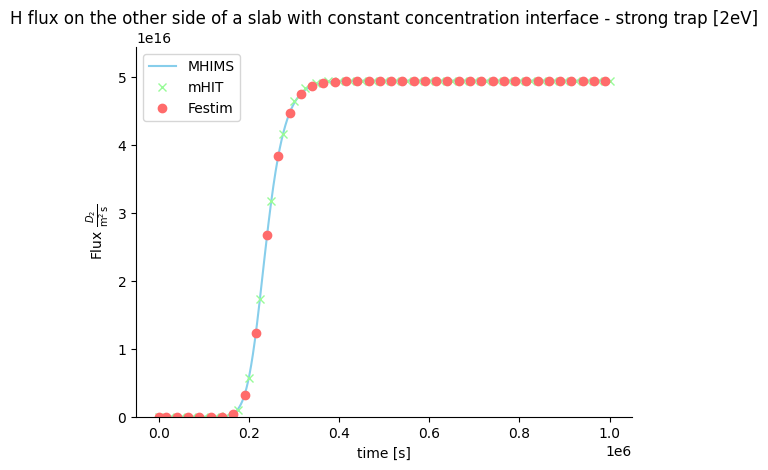

In [2]:

# Assuming 'flux_bulk_4.out' has column headers, you can access the columns by their names:
time_column = fluxbulk3['Time']  # Replace 'Time' with the actual column name for time
flux_column = fluxbulk3['Flux'] 
plt.plot(fluxbulk3['Time'],fluxbulk3['Flux'],color='#87CEEB',label='MHIMS')
#plt.plot(time[1:], flux[1:] * 6.02214076E23 / 2, '--')
plt.plot(a[::25, 0], a[::25, 1], 'x', color='#98FB98',label='mHIT')

plt.plot(b[::250, 0], b[::250, 1], 'o', color='#FF6B6B', label='Festim')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('H flux on the other side of a slab with constant concentration interface - strong trap [2eV]')
plt.xlabel('time [s]')
plt.ylabel(r'Flux $\frac{D_2}{\mathrm{m^2 \, s}}$')
plt.legend( loc='best')
plt.ylim([1E-15, flux[-1] * 1.1 * 6.02214076E23 / 2])

# Add the other figures here...
plt.savefig('IntermediateTrap.jpg',dpi=450)
plt.show()


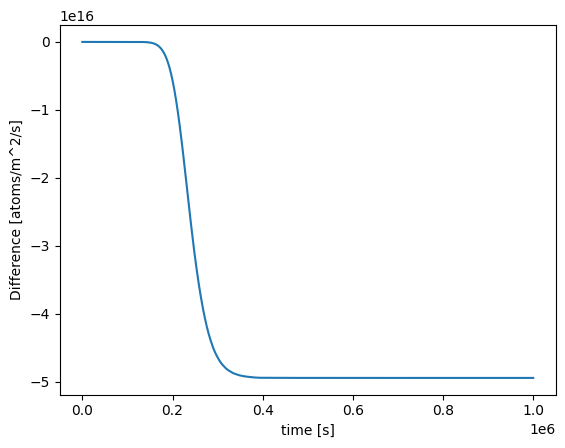

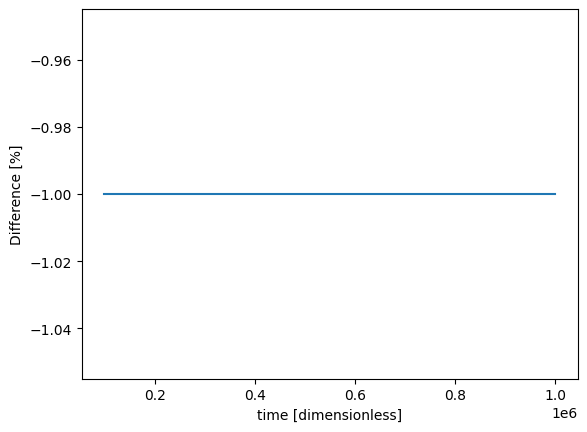

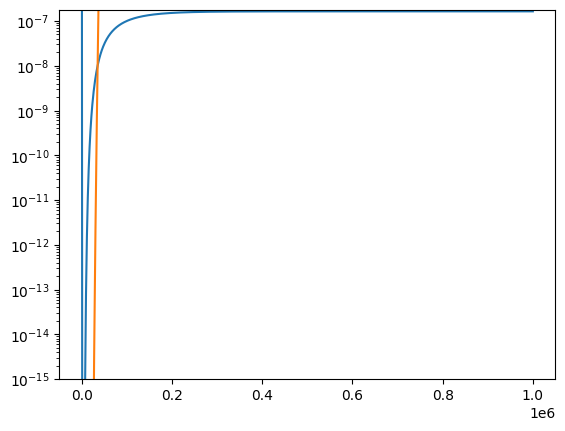

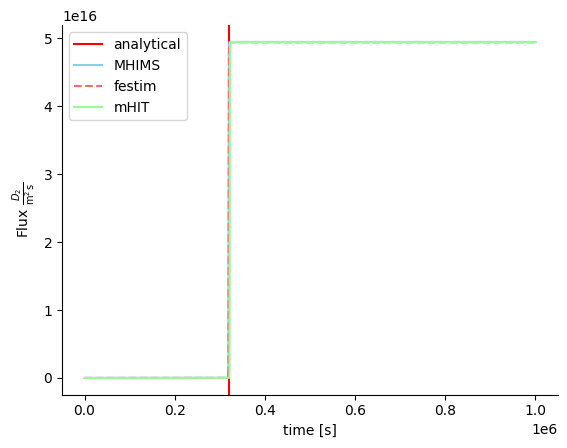

In [3]:
# Figure 2
plt.figure(2)
plt.plot(time, flux - a[:, 1])
plt.xlabel('time [s]')
plt.ylabel('Difference [atoms/m^2/s]')

# Figure 3
plt.figure(3)
plt.plot(time[99:], (flux[99:] - a[99:, 1]) / a[99:, 1])
plt.xlabel('time [dimensionless]')
plt.ylabel('Difference [%]')

# Calculate err_steepest_perc
err_steepest_perc = abs(steepest_an - res) / steepest_an * 100

# Figure 4
plt.figure(4)
plt.semilogy(time, flux)
plt.semilogy(a[:, 0], a[:, 1])
plt.ylim([1E-15, flux[-1] * 1.1])

# Figure 5
plt.figure(5)
a = np.loadtxt('Flux25EvV32Trap.txt')
b = np.loadtxt('Strong_flux_festim.txt')


E_1 = 2.5
zeta = (N_Tis * np.exp((0.2 - E_1) / (k_B * T)) + c0m * N_A_const) / (rhow * 1E-3)
Deff = D / (1 + 1 / zeta)
flux = np.ones(len(time))
strong_breakthrough = l**2 * n_t * rhow / (2 * c0m * N_Tis * D)
fluxbulk4=pd.read_csv('flux_bulk_4.out',  delim_whitespace=True)  # Adjust the delimiter as needed
new_column_names = {
    'time(s)': 'Time',
    'N_conf_rec*flux_bulk(molecule.m-2s-1)': 'Flux'
}

fluxbulk4.rename(columns=new_column_names, inplace=True)
# Now you can use 'time_column' and 'flux_column' in your calculations and plotting.

for m in range(1, 10001):
    add = 2 * (-1)**m * np.exp(-m**2 * np.pi**2 * Deff * time / l**2)
    flux += add
index = np.where(a[:, 1] > 0.99 * fluxbulk4['Flux'].iloc[-1])
time_br_comsol = a[index[0][0], 0]
flux = flux * c0m * D / l
#plt.plot(time[1:], flux[1:] * 6.022E23 / 2, '--b')
stronganalytical = l**2 * n_t / (2 * c0m * D) * rhow / 6.02214076E23
import pandas as pd

plt.axvline(x=stronganalytical, color='r',label='analytical')
plt.plot(fluxbulk4['Time'], fluxbulk4['Flux'], color='#87CEEB',label='MHIMS')

plt.plot(b[:, 0], b[:, 1], '--', color='#FF6B6B',label='festim')
plt.plot(a[:, 0], a[:, 1],label='mHIT',color='#98FB98')
plt.legend( loc='best')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.xlim([stronganalytical*0.9,stronganalytical*1.1])
# ["mHIT trap 3", "Analytical Deff trap 3", "MHIMS trap 3", "breakthrough trap 3", "festim"],
# Calculate error_br
error_br = abs(stronganalytical - time_br_comsol) / stronganalytical * 100
plt.xlabel('time [s]')
plt.ylabel(r'Flux $\frac{D_2}{\mathrm{m^2 \, s}}$')
plt.savefig('StrongTrap.jpg',dpi=450)
plt.show()
